<a href="https://colab.research.google.com/github/ZyadMostafa/python_AI_projects/blob/Projects/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Normalizing the data

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Build the model 

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)
model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2540 - accuracy: 0.9263
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1044 - accuracy: 0.9678
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0724 - accuracy: 0.9779
INFO:tensorflow:Assets written to: handwritten.model/assets


We can now use the model directly after saving it

In [6]:
model = tf.keras.models.load_model('handwritten.model')
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9709
0.09337665885686874
0.9708999991416931


# Explain Terms

**Sequential** has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer

**Dense** which means each neuron in the dense layer receives input from all neurons of its previous layer

**relu activation function** The function returns 0 if it receives any negative input, but for any positive value x it returns that value back.so if the image contain number 2 the layer (3) will return the highest value

**Softmax activation** The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities.

**Optimizar** make the model faster in building

**Adam optimizar** a combination of two optimizer (rmsprop and momentum)

**epochs** indicates the number of passes of the entire training dataset the machine learning algorithm has completed

# Try your own data

This digit is probably a 4


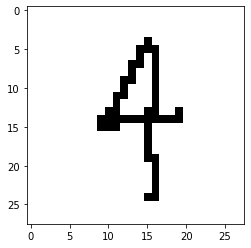

This digit is probably a 6


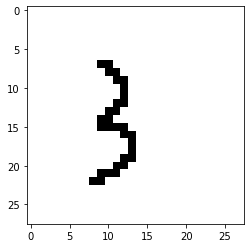

This digit is probably a 4


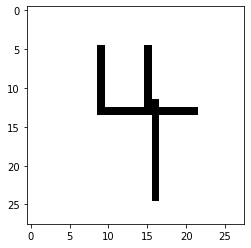

This digit is probably a 7


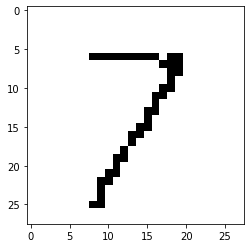

This digit is probably a 9


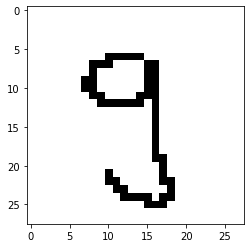

This digit is probably a 4


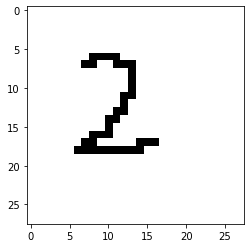

This digit is probably a 7


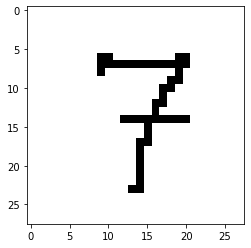

This digit is probably a 9


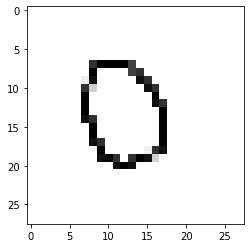

This digit is probably a 1


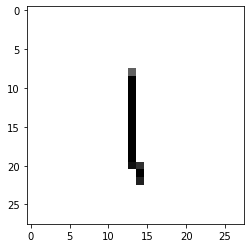

In [7]:
image_number = 1
while os.path.isfile(f"/content/digit{image_number}.png"):
  try:
    img = cv2.imread(f"/content/digit{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  finally:
    image_number += 1